In [1]:
#Please execute this cell
import sys;
sys.path.append('../../../'); 
import jupman;

# Midterm - Thu 10, Jan 2019

**Scientific Programming - Data Science Master @ University of Trento**

## [Download exercises and solution](../../../_static/generated/sciprog-ds-2019-01-10-exam.zip)

### What to do

1) Download  `sciprog-ds-2019-01-10-exam.zip` and extract it <b>on your desktop</b>. Folder content should be like this:

```
sciprog-ds-2019-01-10-FIRSTNAME-LASTNAME-ID
    gaps.py
    gaps_test.py
    tasks.py
    tasks_test.py
    exits.py
    exits_test.py
    jupman.py
    sciprog.py            
```

2) Rename `sciprog-ds-2019-01-10-FIRSTNAME-LASTNAME-ID` folder: put your name, lastname an id number, like `sciprog-ds-2019-01-10-john-doe-432432`

From now on, you will be editing the files in that folder. At the end of the exam, that is what will be evaluated.

3) Edit the files following the instructions in this worksheet for each exercise. Every exercise should take max 25 mins. If it takes longer, leave it and try another exercise.

4) When done:

if you have unitn login:  zip and send to [examina.icts.unitn.it](http://examina.icts.unitn.it)
  
If you don't have unitn login: tell instructors and we will download your work manually
 


## Introduction

## B1 Theory

Please write the solution in the text file `theory.txt`

Given the following function:

```python
def fun(N, M):
    S1 = set(N)
    S2 = set(M)
    res = []
    for x in S1:
        if x in S2:
            for i in range(N.count(x)):
                res.append(x)
    return res
```

let `N` and `M` be two lists of length `n` and `m`, respectively. What is the computational complexity of function `fun()` with respect to `n` and `m`?



## B2 Gaps linked list

Given a linked list of size n which only contains integers, a gap is an **index** `i`, `0<i<n`, such that `L[i−1]<L[i]`. 
For the purpose of this exercise, we assume an empy list or a list with one element have zero gaps


**Example**: 

```
   data:  9 7 6 8 9 2 2 5 
  index:  0 1 2 3 4 5 6 7  
```

contains three gaps [3,4,7] because:

- number 8 at index 3 is greater than previous number 6 at index 2
- number 9 at index 4 is greater than previous number 8 at index 3
- number 5 at index 7 is greater than previous number 2 at index 6





Open file `gaps.py` and implement this method:

```python
    def gaps(self):
        """ Assuming all the data in the linked list is made by numbers,
            finds the gaps in the LinkedList and return them as a Python list.
            
            - we assume empty list and list of one element have zero gaps
            - MUST perform in O(n) where n is the length of the list

            NOTE: gaps to return are *indeces* , *not* data!!!!
        """
```

**Testing**: `python3 -m unittest gaps_test.GapsTest`

## B3 Tasks stack

Very often, you begin to do a task just to discover it requires doing 3 other tasks, so you start carrying them out one at a time and discover one of them actually requires to do yet another two other subtasks....

To represent the fact a task may have subtasks, we will use a dictionary mapping a task label to a list of subtasks, each represented as a label. For example:

In [2]:
subtasks = {
        'a':['b','g'],
        'b':['c','d','e'],
        'c':['f'],
        'd':['g'],
        'e':[],
        'f':[],
        'g':[]
    }

Task `a` requires subtasks `b` and`g` to be carried out (in this order), but task `b` requires subtasks `c`, `d` and `e` to be done. `c` requires `f` to be done, and `d`  requires `g`. 

You will have to implement a function called `do` and use a Stack data structure, which is already provided and you don't need to implement. Let's see an example of execution. 

**IMPORTANT**: In the execution example, there are many prints just to help you understand what's going on, but the only thing we actually care about is the final list returned by the function!

**IMPORTANT**: notice subtasks are scheduled in reversed order, so the item on top of the stack will be the first to get executed !

In [3]:
from tasks_sol import *

do('a', subtasks)

DEBUG:  Stack:   elements=['a']
DEBUG:  Doing task a, scheduling subtasks ['b', 'g']
DEBUG:           Stack:   elements=['g', 'b']
DEBUG:  Doing task b, scheduling subtasks ['c', 'd', 'e']
DEBUG:           Stack:   elements=['g', 'e', 'd', 'c']
DEBUG:  Doing task c, scheduling subtasks ['f']
DEBUG:           Stack:   elements=['g', 'e', 'd', 'f']
DEBUG:  Doing task f, scheduling subtasks []
DEBUG:           Nothing else to do!
DEBUG:           Stack:   elements=['g', 'e', 'd']
DEBUG:  Doing task d, scheduling subtasks ['g']
DEBUG:           Stack:   elements=['g', 'e', 'g']
DEBUG:  Doing task g, scheduling subtasks []
DEBUG:           Nothing else to do!
DEBUG:           Stack:   elements=['g', 'e']
DEBUG:  Doing task e, scheduling subtasks []
DEBUG:           Nothing else to do!
DEBUG:           Stack:   elements=['g']
DEBUG:  Doing task g, scheduling subtasks []
DEBUG:           Nothing else to do!
DEBUG:           Stack:   elements=[]


['a', 'b', 'c', 'f', 'd', 'g', 'e', 'g']

The `Stack` you must use is simple and supports `push`, `pop`, and `is_empty` operations:

In [4]:
s = Stack()

In [5]:
print(s)

Stack:   elements=[]


In [6]:
s.is_empty()

True

In [7]:
s.push('a')

In [8]:
print(s) 

Stack:   elements=['a']


In [9]:
s.push('b')

In [10]:
print(s)

Stack:   elements=['a', 'b']


In [11]:
s.pop()

'b'

In [12]:
print(s)

Stack:   elements=['a']


### B3.1 do

Now open `tasks_stack.py` and implement function `do`:

```python
def do(task, subtasks):
    """ Takes a task to perform and a dictionary of subtasks, 
        and RETURN a list of performed tasks
         
        - To implement it, inside create a Stack instance and a while cycle. 
        - DO *NOT* use a recursive function
        - Inside the function, you can use a print like "I'm doing task a', 
          but that is only to help yourself in debugging, only the
          list returned by the function will be considered in the evaluation!
    """

```


**Testing**: `python3 -m unittest tasks_test.DoTest`

### B3.2 do_level

In this exercise, you are asked to implement a slightly more complex version of the previous function where on the `Stack` you push two-valued tuples, containing the task label and the associated level. The first task has level 0, the immediate subtask has level 1, the subtask of the subtask has level 2 and so on and so forth. In the list returned by the function, you will put such tuples. 

One possibile use is to display the executed tasks as an indented tree, where the indentation is determined by the level. Here we see an example:

**IMPORTANT**: Again, the prints are only to let you understand what's going on, and you are _not_ required to code them. The only thing that really matters is the list the function must return !

In [13]:
subtasks = {
        'a':['b','g'],
        'b':['c','d','e'],
        'c':['f'],
        'd':['g'],
        'e':[],
        'f':[],
        'g':[]
    }
        
do_level('a', subtasks)

DEBUG:  						Stack:   elements=[('a', 0)]
DEBUG:  I'm doing 	a		level=0 Stack:   elements=[('g', 1), ('b', 1)]
DEBUG:  I'm doing 	  b		level=1 Stack:   elements=[('g', 1), ('e', 2), ('d', 2), ('c', 2)]
DEBUG:  I'm doing 	    c		level=2 Stack:   elements=[('g', 1), ('e', 2), ('d', 2), ('f', 3)]
DEBUG:  I'm doing 	      f		level=3 Stack:   elements=[('g', 1), ('e', 2), ('d', 2)]
DEBUG:  I'm doing 	    d		level=2 Stack:   elements=[('g', 1), ('e', 2), ('g', 3)]
DEBUG:  I'm doing 	      g		level=3 Stack:   elements=[('g', 1), ('e', 2)]
DEBUG:  I'm doing 	    e		level=2 Stack:   elements=[('g', 1)]
DEBUG:  I'm doing 	  g		level=1 Stack:   elements=[]


[('a', 0),
 ('b', 1),
 ('c', 2),
 ('f', 3),
 ('d', 2),
 ('g', 3),
 ('e', 2),
 ('g', 1)]


Now implement the function: 

```python
def do_level(task, subtasks):
    """ Takes a task to perform and a dictionary of subtasks, 
        and RETURN a list of performed tasks, as tuples (task label, level)
         
        - To implement it, use a Stack and a while cycle
        - DO *NOT* use a recursive function
        - Inside the function, you can use a print like "I'm doing task a', 
          but that is only to help yourself in debugging, only the
          list returned by the function will be considered in the evaluation
    """
```

**Testing**: `python3 -m unittest tasks_test.DoLevelTest`

## B4 Exits graph


There is a place nearby Trento called Silent Hill, where people always study and do little else. Unfortunately, one day an unethical biotech AI experiment goes wrong and a buggy cyborg is left free to roam in the building. To avoid panic, you are quickly asked to devise an evacuation plan. The place is a well known labyrinth, with endless corridors also looping into cycles. But you know you can model this network as a digraph, and decide to represent crossings as nodes. When a crossing has a door to leave the building, its label starts with letter `e`, while when there is no such door the label starts with letter `n`.

In the example below, there are three exits `e1`, `e2`, and `e3`.  Given a node, say `n1`, you want to tell the crowd in that node the **shortest** paths leading to the three exits. To avoid congestion, one third of the crowd may be told to go to  `e2`, one third to reach `e1` and  the remaining third will go to `e3` even if they are farther than `e2`.

In python terms, we would like to obtain a dictionary of paths like the following, where as keys we have the exits and as values the shortest sequence of nodes from `n1` leading to that exit

```python
{
    'e1': ['n1', 'n2', 'e1'], 
    'e2': ['n1', 'e2'], 
    'e3': ['n1', 'e2', 'n3', 'e3']
}
```

In [14]:
from sciprog import draw_dig
from exits_sol import *
from exits_test import dig


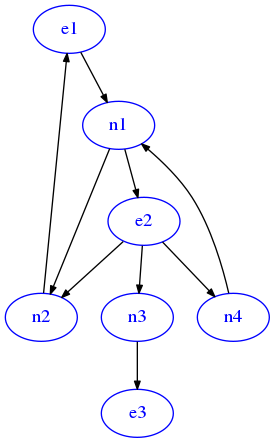

In [15]:
G = dig({'n1':['n2','e2'],
         'n2':['e1'],
         'e1':['n1'],
         'e2':['n2','n3', 'n4'],
         'n3':['e3'],
         'n4':['n1']})
draw_dig(G)


You will solve the exercise in steps, so open `exits_sol.py` and proceed reading the following points.

### B4.1 cp

Implement this method

```python
    def cp(self, source):
        """ Performs a BFS search starting from provided node label source and 
            RETURN a dictionary of nodes representing the visit tree in the 
            child-to-parent format, that is, each key is a node label and as value 
            has the node label from which it was discovered for the first time

            So if node "n2" was discovered for the first time while
            inspecting the neighbors of "n1", then in the output dictionary there 
            will be the pair "n2":"n1".

            The source node will have None as parent, so if source is "n1" in the 
            output dictionary there will be the pair  "n1": None

            NOTE: This method must *NOT* distinguish between exits 
                  and normal nodes, in the tests we label them n1, e1 etc just
                  because we will reuse in next exercise
            NOTE: You are allowed to put debug prints, but the only thing that
                  matters for the evaluation and tests to pass is the returned 
                  dictionary
        """
```

**Testing**: `python3 -m unittest exits_test.CpTest`

**Example:**

In [16]:
G.cp('n1')

DEBUG:  Removed from queue: n1
DEBUG:    Found neighbor: n2
DEBUG:      not yet visited, enqueueing ..
DEBUG:    Found neighbor: e2
DEBUG:      not yet visited, enqueueing ..
DEBUG:    Queue is: ['n2', 'e2'] 
DEBUG:  Removed from queue: n2
DEBUG:    Found neighbor: e1
DEBUG:      not yet visited, enqueueing ..
DEBUG:    Queue is: ['e2', 'e1'] 
DEBUG:  Removed from queue: e2
DEBUG:    Found neighbor: n2
DEBUG:      already visited
DEBUG:    Found neighbor: n3
DEBUG:      not yet visited, enqueueing ..
DEBUG:    Found neighbor: n4
DEBUG:      not yet visited, enqueueing ..
DEBUG:    Queue is: ['e1', 'n3', 'n4'] 
DEBUG:  Removed from queue: e1
DEBUG:    Found neighbor: n1
DEBUG:      already visited
DEBUG:    Queue is: ['n3', 'n4'] 
DEBUG:  Removed from queue: n3
DEBUG:    Found neighbor: e3
DEBUG:      not yet visited, enqueueing ..
DEBUG:    Queue is: ['n4', 'e3'] 
DEBUG:  Removed from queue: n4
DEBUG:    Found neighbor: n1
DEBUG:      already visited
DEBUG:    Queue is: ['e3'] 
DEBUG: 

{'n1': None,
 'n2': 'n1',
 'e2': 'n1',
 'e1': 'n2',
 'n3': 'e2',
 'n4': 'e2',
 'e3': 'n3'}

Basically, the dictionary above represents this visit tree:

```
              n1
             /   \
           n2     e2
            \    /  \
            e1   n3  n4
                 |
                 e3
```



### B4.2 exits

Implement this function. **NOTE**: the function is external to class DiGraph.

```python
def exits(cp):
    """
        INPUT: a dictionary of nodes representing a visit tree in the 
        child-to-parent format, that is, each key is a node label and as value 
        has its parent as a node label. The root has associated None as parent.

        OUTPUT: a dictionary mapping node labels of exits to the shortest path
                from the root to the exit (root and exit included)
                
    """
```

**Testing**: `python3 -m unittest exits_test.ExitsTest`

**Example**: 

In [17]:
# as example we can use the same dictionary outputted by the cp call in the previous exercise

visit_cp = { 'e1': 'n2',
             'e2': 'n1',
             'e3': 'n3',
             'n1': None,
             'n2': 'n1',
             'n3': 'e2',
             'n4': 'e2'
            }
exits(visit_cp)

{'e1': ['n1', 'n2', 'e1'], 'e2': ['n1', 'e2'], 'e3': ['n1', 'e2', 'n3', 'e3']}

In [18]:
# ignore this cell
import exits_sol
exits_sol.DEBUG = False
import exits_test
jupman.run(exits_test)


...........................
----------------------------------------------------------------------
Ran 27 tests in 0.040s

OK


In [19]:
#Ignore this cell
import tasks_sol
tasks_sol.DEBUG = False
import tasks_test

jupman.run(tasks_test)

....................
----------------------------------------------------------------------
Ran 20 tests in 0.011s

OK
